<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We are given with the question of the list of bank .
# We need to predict a best fit of the model for finding its accuracy
# Through Logistic Regression Algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
# Loading the Dataset
import pandas as pd
bank = pd.read_csv('bank-full.csv',sep =';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Observing the information

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Checking for null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# shape of bank
bank.shape


(45211, 17)

In [ ]:
bank = bank.dropna()
bank.shape

(45211, 17)

Therefore no NA values in bank

In [ ]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

We take the count of values whether y is subscribed or not.
We see that majority have not subscibed for term deposit.

In [ ]:
   #   LOGISTIC REGRESSION MODEL

In [ ]:
# As Logistic Regression takes only 1's and 0's.We need to replace all the characer types 'yes' and 'no'
# in all the columns by 1's and 0's respectively.
# For this , we can ''' LABEL ENCODER ''' function which is majorly used in python. 

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Dropping irrelevant columns which are not needed in prediction

In [ ]:
Bank = bank.drop(['marital','education','default'],axis=1)

In [ ]:
Bank

,age,job,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
Bank.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
Bank['job1'] = labelencoder.fit_transform(Bank['job'])
Bank['housing1'] = labelencoder.fit_transform(Bank['housing'])
Bank['contact1'] = labelencoder.fit_transform(Bank['contact'])
Bank['loan1']=labelencoder.fit_transform(Bank['loan'])
Bank['poutcome1'] = labelencoder.fit_transform(bank['poutcome'])
Bank['y1']=labelencoder.fit_transform(bank['y'])

In [ ]:
Bank

,age,job,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job1,housing1,contact1,loan1,poutcome1,y1
0,58,management,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4,1,2,0,3,0
1,44,technician,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,9,1,2,0,3,0
2,33,entrepreneur,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,1,2,1,3,0
3,47,blue-collar,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,1,2,0,3,0
4,33,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,9,0,0,0,3,1
45207,71,retired,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,0,0,0,3,1
45208,72,retired,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,0,0,2,1
45209,57,blue-collar,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1,0,1,0,3,0


In [ ]:
Bank.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'job1',
       'housing1', 'contact1', 'loan1', 'poutcome1', 'y1'],
      dtype='object')

In [ ]:
Bank.shape

(45211, 20)

In [ ]:
# Dividing our data into input and output variables.

Y = Bank.iloc[:,-1]
X = Bank.iloc[:,[0,2,8,9,10,11,14,15,17,18]]
print(Y)
X


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y1, Length: 45211, dtype: int64


,age,balance,duration,campaign,pdays,previous,job1,housing1,loan1,poutcome1
0,58,2143,261,1,-1,0,4,1,0,3
1,44,29,151,1,-1,0,9,1,0,3
2,33,2,76,1,-1,0,2,1,1,3
3,47,1506,92,1,-1,0,1,1,0,3
4,33,1,198,1,-1,0,11,0,0,3
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,9,0,0,3
45207,71,1729,456,2,-1,0,5,0,0,3
45208,72,5715,1127,5,184,3,5,0,0,2
45209,57,668,508,4,-1,0,1,0,0,3


In [ ]:
logreg = LogisticRegression()
logreg.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X)
print(y_pred)
print('Accuracy of logistic regression classifier =  ',round(logreg.score(X, Y)*100,2))

[0 0 0 ... 0 0 0]
Accuracy of logistic regression classifier =   88.83


In [ ]:
# Confusion Matrix
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39328   594]
 [ 4456   833]]


Confusion Matrix Interpretation:

-> From the above Confusion matrix, we can say that,

The diagnol values a=39257 , d = 903 are correct prediction values.
The other diagnol values b=665, c=4386 are wrong prediction values.



In [ ]:
# Finding accuracy
a=39328
b=594
c=4456
d=833

accuracy = (a+d)/(a+b+c+d)
print('accuracy =',accuracy*100,'%')

accuracy = 88.83015195417045 %


The model gives an accuracy of 88.83%.

In [ ]:
# Finding Sensitivity and Specificity:

a=39328
b=594
c=4456
d=833
Sensitivity = a/(a+c)
Specificity = d/(b+d)
print('Sensitivity = ',Sensitivity)
print('Specificity = ',Specificity)

Sensitivity =  0.8982276630732687
Specificity =  0.5837421163279608


Since,we have High Sensitivity , it indicates that it is a good fit.

In [ ]:
# Finding ROC curve

Text(0, 0.5, 'True Positive Rate')

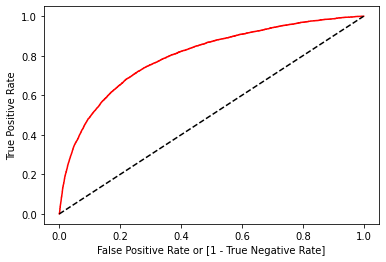

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, logreg.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [ ]:
auc

0.5713088385842656

In [ ]:
auc*100

57.130883858426564

# This model has been predicted that the model has an accuracy of 88.83% and Sensitivity of 89.8% and Specificity of 58.3%

# We get an auc (Area Under Curve) value to be 57.13%. 
#Hence , This could be a best fit for the model.